In [18]:
import seaborn as sns
import json
import pandas as pd
import numpy as np
sns.set(rc={'figure.figsize':(5,5)})

def load_results(file):
    with open(file, 'r') as f:
        results = json.load(f)

    df = pd.DataFrame(results)

    def amin(sub_df):
        # print(sub_df.iloc[np.argmin(sub_df.loss)].shape)
        row = sub_df.iloc[np.argmin(sub_df.loss)].copy()
        row['max_loss'] = np.max(sub_df.loss) 
        row['q025_loss'] = np.quantile(sub_df.loss, 0.025)
        row['q975_loss'] = np.quantile(sub_df.loss, 0.975)
        row['var_loss'] = np.var(sub_df.loss) 
        return row

    return df #.groupby(['method', 'p', 'N']).apply(amin)


def plot_grid(df, var):
    g = sns.FacetGrid(df, row='N', col='p', hue='method')
    g.map(sns.lineplot, var, 'loss')
    g.add_legend()

sphere_df = load_results('../cross_val_results_outputs/sphere_cross_val_out.json')
phase_df = load_results('../cross_val_results_outputs/phase_cross_val_out.json')
wass_df = load_results('../cross_val_results_outputs/wasserstein_cross_val_out.json')

# Subsample frac

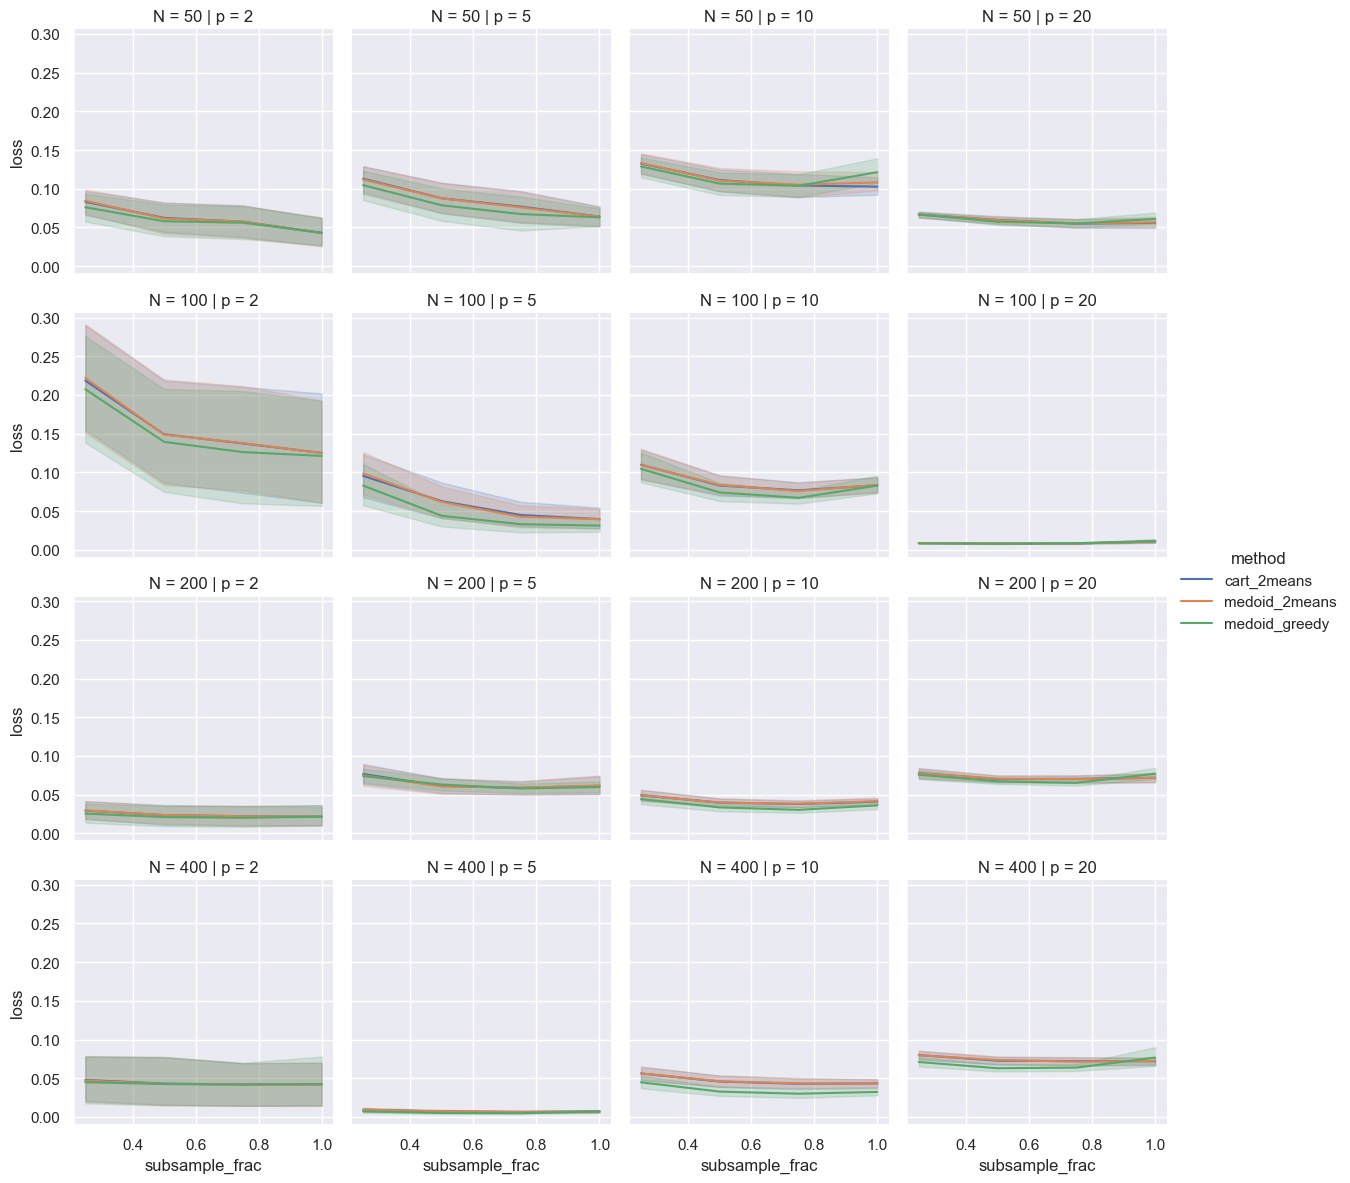

In [25]:
plot_grid(sphere_df, 'subsample_frac')

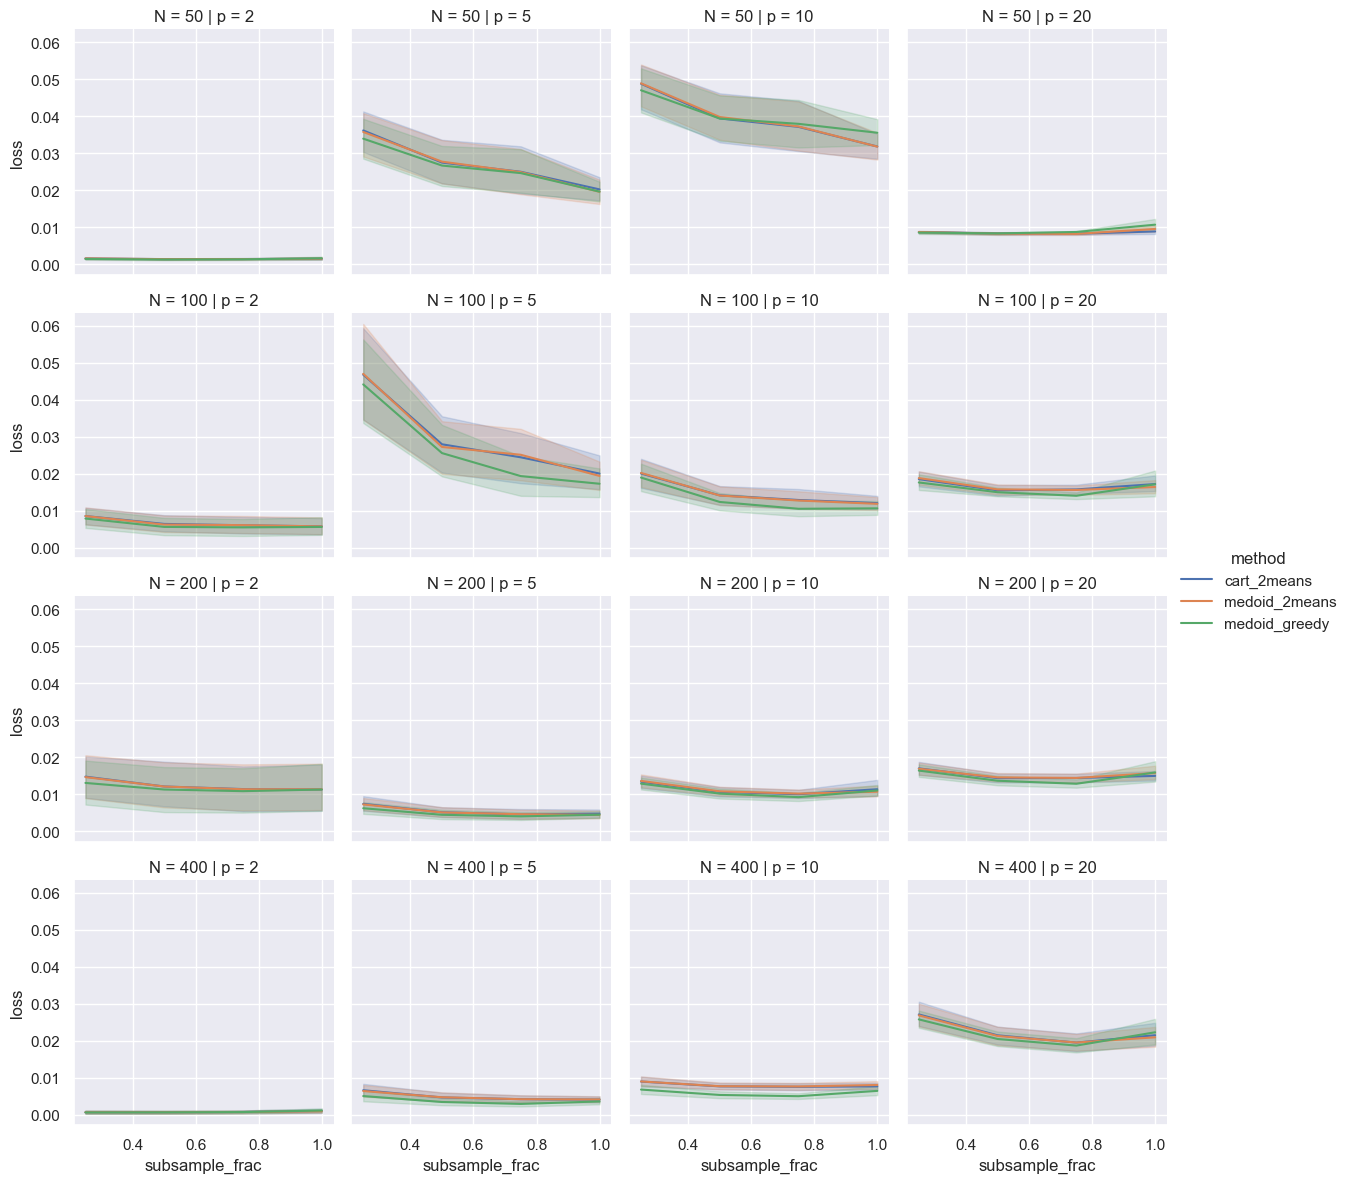

In [26]:
plot_grid(phase_df, 'subsample_frac')

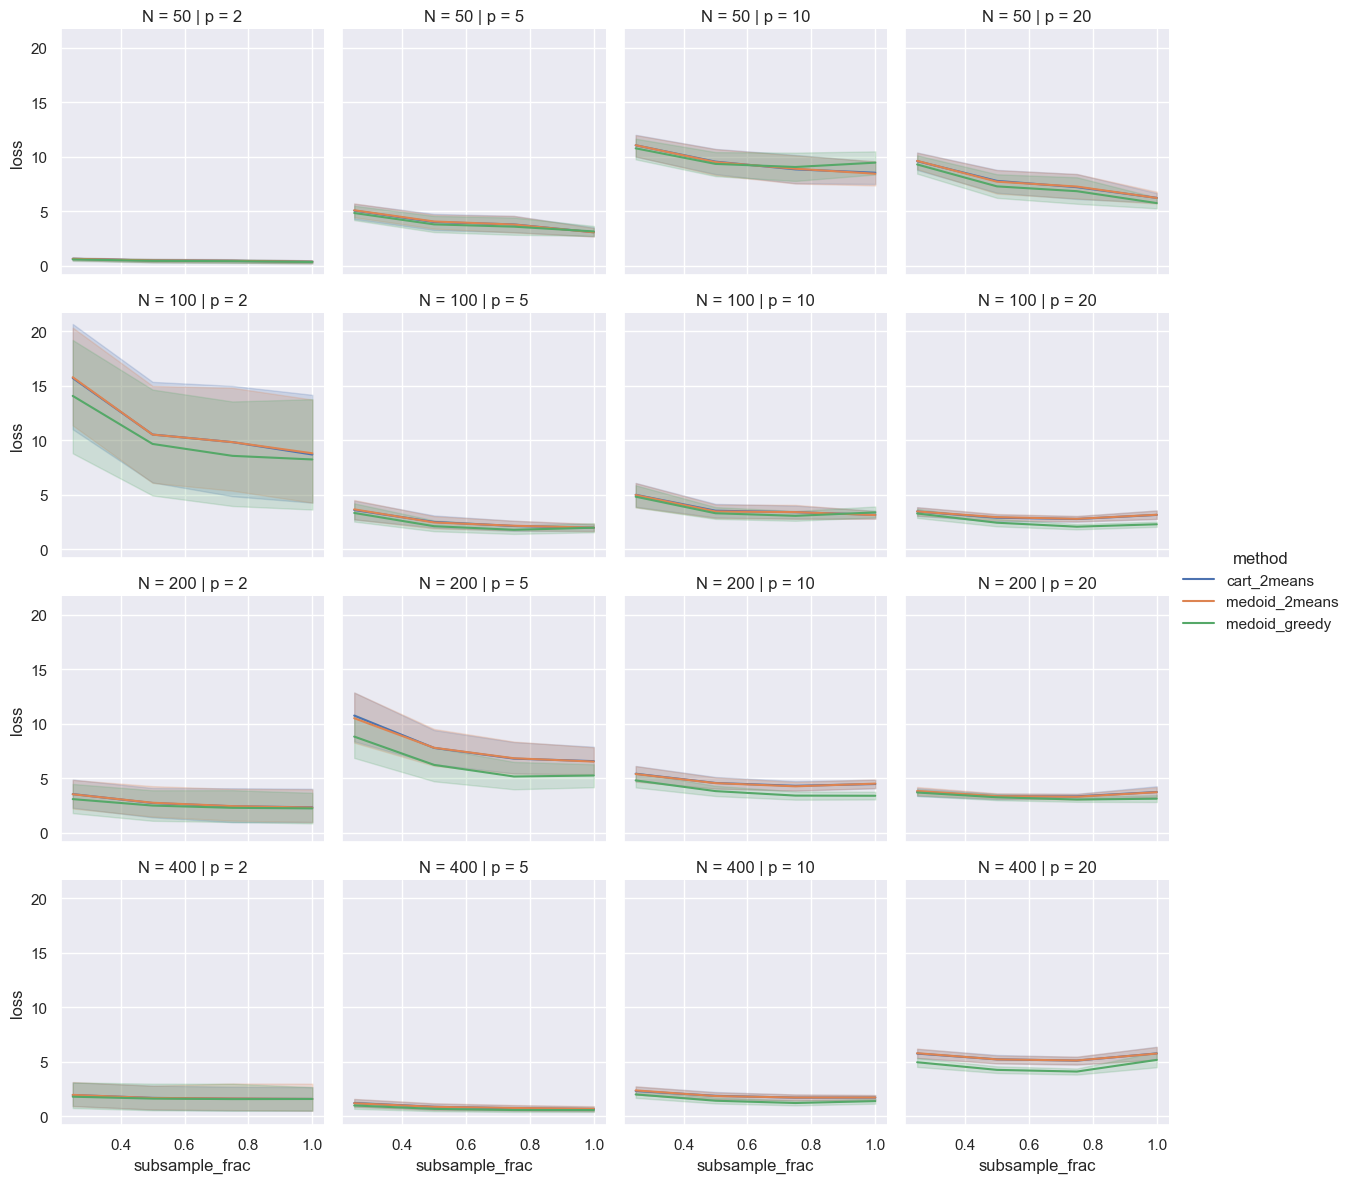

In [27]:
plot_grid(wass_df, 'subsample_frac')

# Mtry

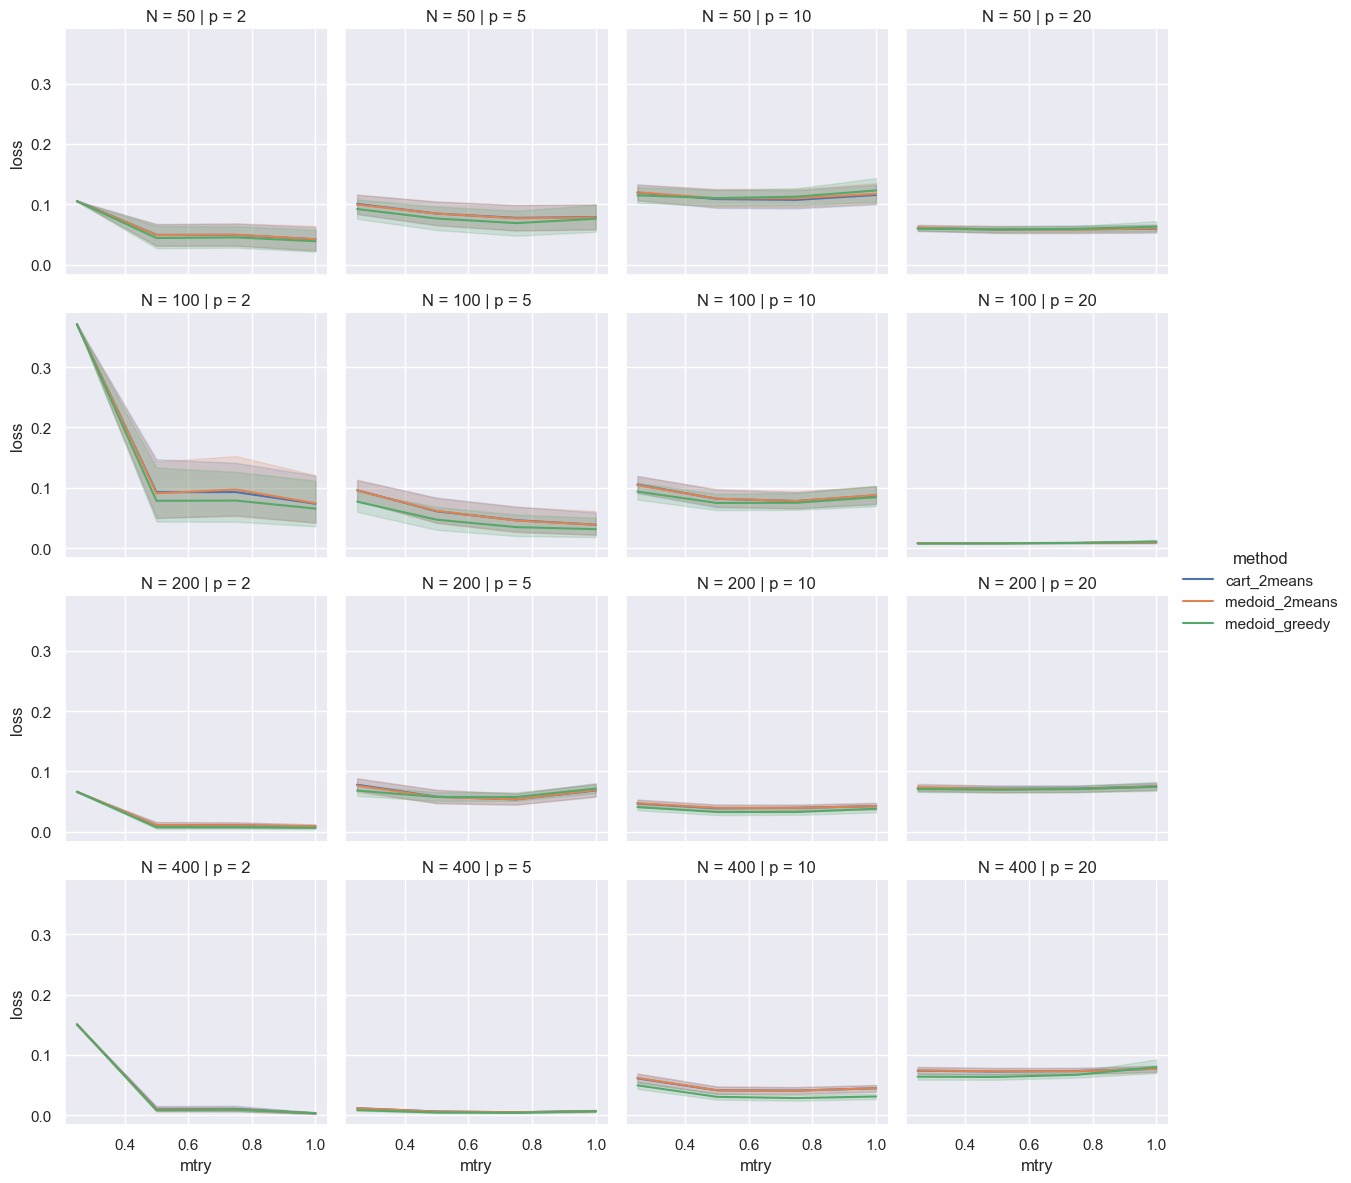

In [28]:
plot_grid(sphere_df, 'mtry')

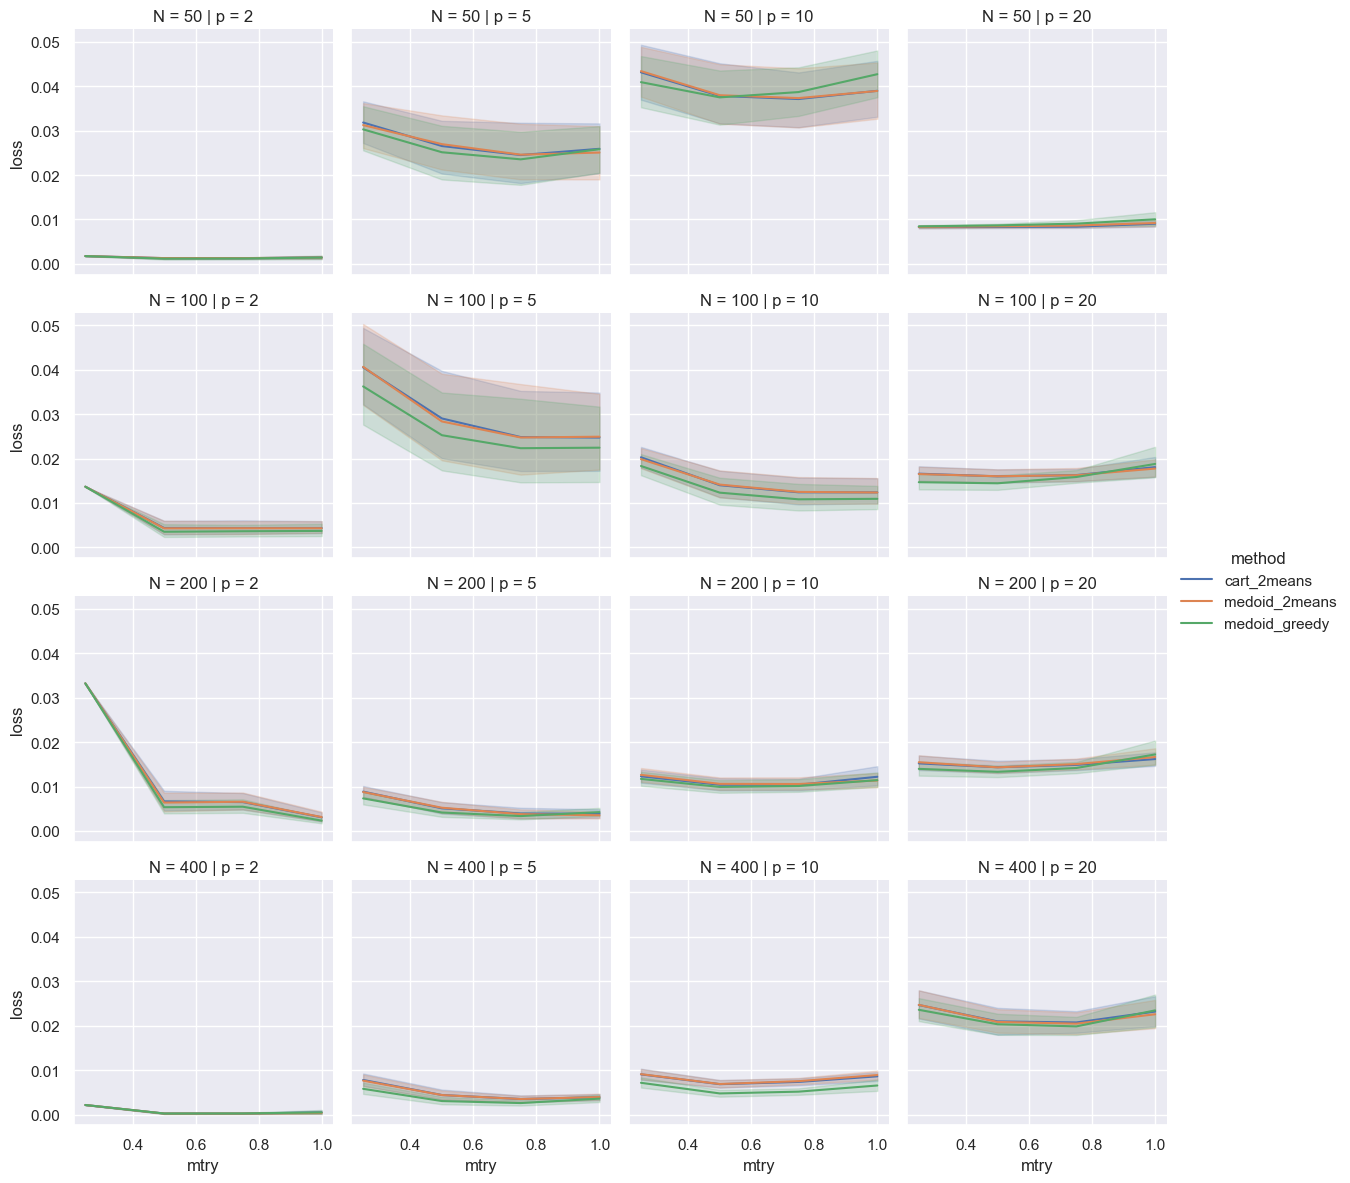

In [29]:
plot_grid(phase_df, 'mtry')

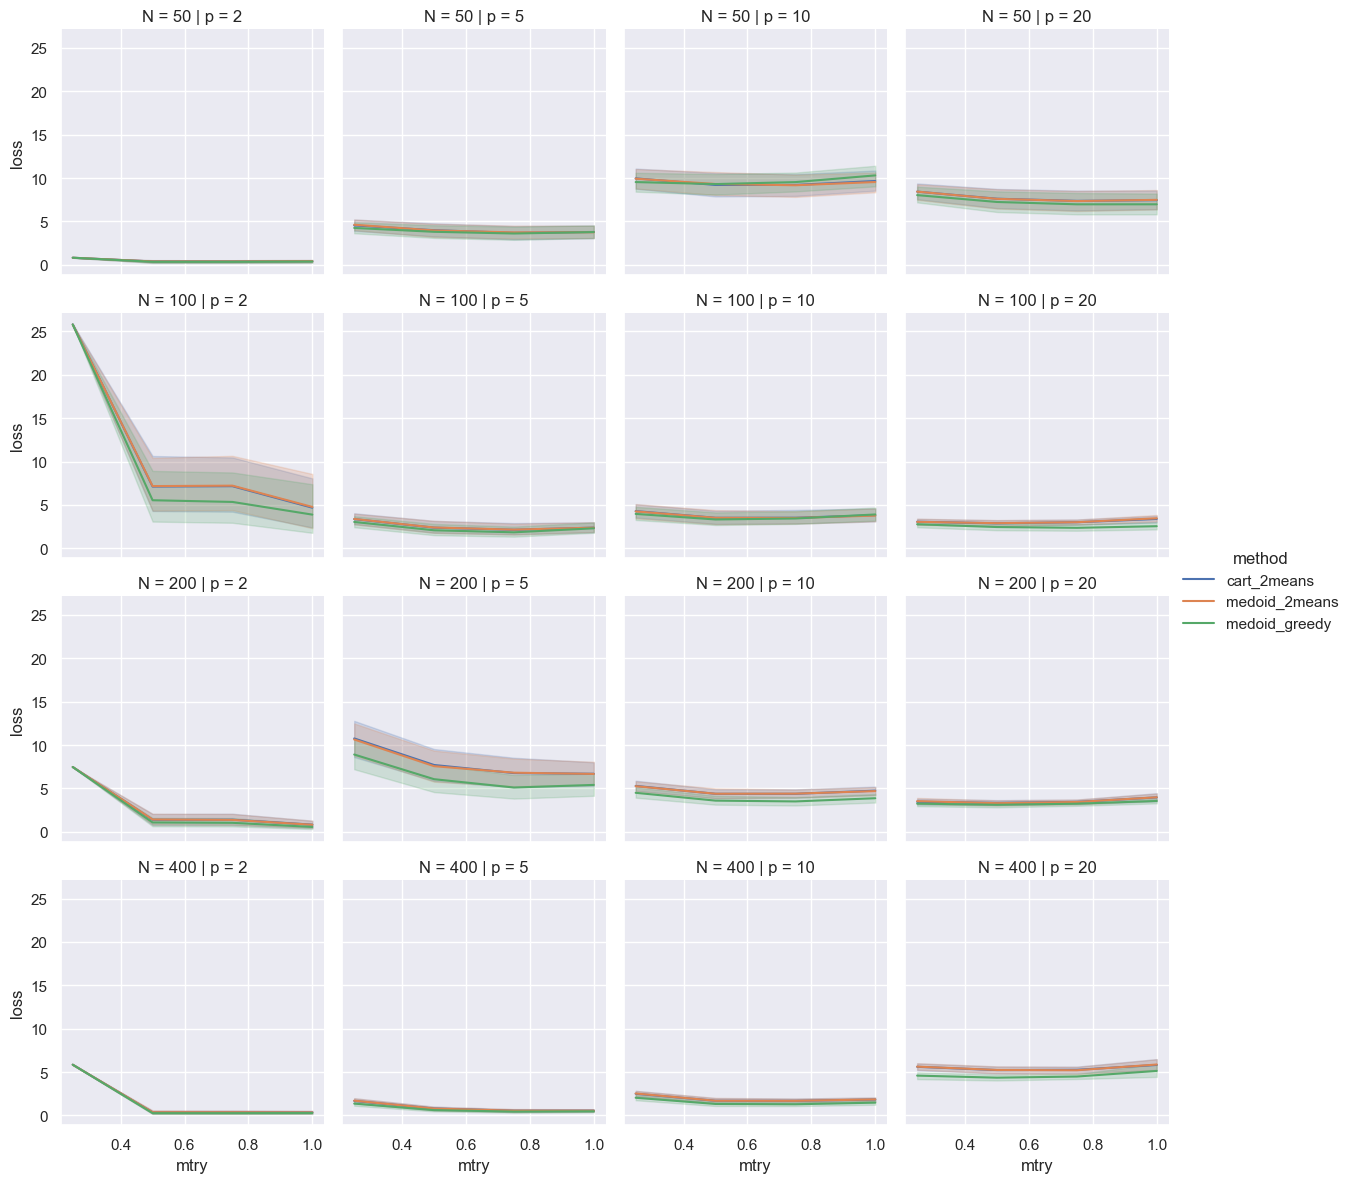

In [30]:
plot_grid(wass_df, 'mtry')